In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import pyproj as proj

from geopy.distance import great_circle as vc
import math as Math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import shapely.geometry as sgeom

import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pickle import load

In [2]:
def get_lon(number):
    num = round((number % 150) + -136.9)
    
    return num

def get_lat(number):
    num = ((number // 150) + 7)
    return num

In [3]:
# load the scaler
scaler = load(open('data/scaler.pkl', 'rb'))

In [4]:
test = pd.read_csv('data/test_results.csv', usecols=['Time', 'Min_Pressure_mbar', 
                                                     'distance', 
                                                     'direction', 
                                                     'gridID'] )

In [5]:
rescaled = scaler.inverse_transform(test)

D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
D:\Programs\Anaconda\envs\Python_Final_Project\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [6]:
test = pd.DataFrame(rescaled, columns=['Time', 'Min_Pressure_mbar', 
                                     'distance',  
                                     'direction', 
                                     'gridID'])

In [7]:
# drop padded rows
test = test[test.Min_Pressure_mbar != 882]
test['timestamp'] = pd.to_datetime(test['Time'])

In [8]:
test.describe()

,Time,Min_Pressure_mbar,distance,direction,gridID,timestamp
count,2.295000e+03,2295.000000,2295.000000,2295.000000,2295.000000,2295
mean,7.861701e+17,993.512418,79.393414,168.034441,2745.985222,1994-11-30 04:35:04.956320512
min,6.782400e+17,916.000000,0.000000,0.000000,378.135561,1991-06-30 00:00:15.086103552
25%,7.461957e+17,984.000000,41.405324,62.518430,1599.024941,1993-08-24 12:35:37.983717888
50%,8.084039e+17,1000.000000,68.732914,174.542185,2554.931705,1995-08-14 12:37:34.429578624
75%,8.352512e+17,1006.000000,103.877585,259.104630,3681.000207,1996-06-20 06:13:46.671323008
max,8.688402e+17,1020.000000,467.043164,359.918715,7275.932762,1997-07-14 00:29:12.345199488
std,5.288606e+16,17.997401,56.621479,112.502688,1358.282167,NaN


In [9]:
test["Latitude"] = get_lat(test["gridID"])
test["Longitude"] = get_lon(test["gridID"])

In [ ]:
test = test[::-1].reindex()

In [ ]:
test = test.reset_index(drop = True)

In [11]:
data = pd.read_csv('data/checkpoint-dataframe.csv', index_col=0) 

In [12]:
data.describe()

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time,gridID,distance,direction
count,15666.000000,15666.000000,15666.000000,15666.000000,1.566600e+04,15666.000000,15666.000000,15666.000000
mean,993.185880,264.406358,27.039634,-61.297740,1.213766e+18,3015.235287,78.367342,171.861921
std,19.029912,148.944226,10.637424,21.281718,2.804946e+17,1602.373528,54.769225,112.385422
min,882.000000,0.000000,7.000000,-136.900000,6.781968e+17,85.000000,0.000000,0.000000
25%,986.000000,135.000000,18.200000,-78.600000,9.725670e+17,1702.000000,41.897325,71.428799
50%,1000.000000,264.000000,26.600000,-62.400000,1.216642e+18,2920.000000,69.035935,177.631702
75%,1007.000000,396.000000,33.800000,-45.000000,1.473962e+18,3997.750000,102.048680,265.399808
max,1024.000000,523.000000,70.700000,13.500000,1.668190e+18,9582.000000,532.582443,359.958290


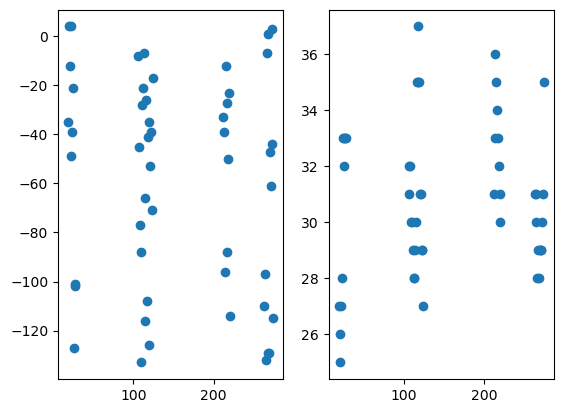

In [13]:
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.scatter(x = test.index[:50], y = test['Longitude'][:50])
ax2.scatter(x = test.index[:50], y = test['Latitude'][:50])

In [14]:
data['timestamp'] = pd.to_datetime(data['Time'])
#data = data.iloc[::-1]
#data = data.reindex()

In [15]:
data[2:2292]

,Min_Pressure_mbar,Storm_ID,Latitude,Longitude,Time,gridID,distance,direction,timestamp
2,1012.0,0,25.9,-80.0,678240000000000000,2756.0,62.153374,232.595676,1991-06-30 00:00:00
3,1012.0,0,26.0,-80.9,678261600000000000,2906.0,56.339603,296.994789,1991-06-30 06:00:00
4,1012.0,0,26.2,-81.8,678283200000000000,2905.0,57.527218,337.336848,1991-06-30 12:00:00
5,1012.0,0,26.7,-82.4,678304800000000000,2904.0,50.705992,359.848347,1991-06-30 18:00:00
6,1012.0,0,27.3,-82.7,678326400000000000,3054.0,45.383868,97.848823,1991-07-01 00:00:00
...,...,...,...,...,...,...,...,...,...
2307,1014.0,80,30.4,-69.9,868600800000000000,3517.0,0.000000,0.000000,1997-07-11 06:00:00
2308,1013.0,80,31.8,-68.9,868622400000000000,3668.0,113.387169,71.623110,1997-07-11 12:00:00
2309,1010.0,80,33.1,-67.6,868644000000000000,3969.0,117.526253,308.152320,1997-07-11 18:00:00
2310,1005.0,80,34.7,-65.8,868665600000000000,4121.0,151.245222,280.501049,1997-07-12 00:00:00


Text(0.5, 0.98, 'Longitude distributions')

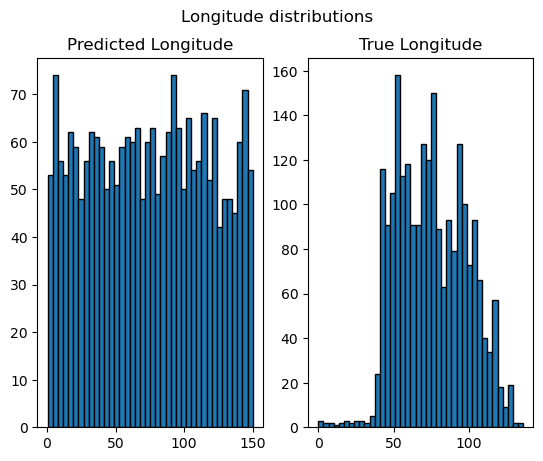

In [16]:
fig, [ax1, ax2] = plt.subplots(1,2)

ax1.hist(test["gridID"]%150, bins = 40, edgecolor='black')
ax1.set_title("Predicted Longitude")
ax2.hist(data.loc[15685-2295:, "gridID"]%150, bins=40, edgecolor='black')
ax2.set_title("True Longitude")

fig.suptitle("Longitude distributions")

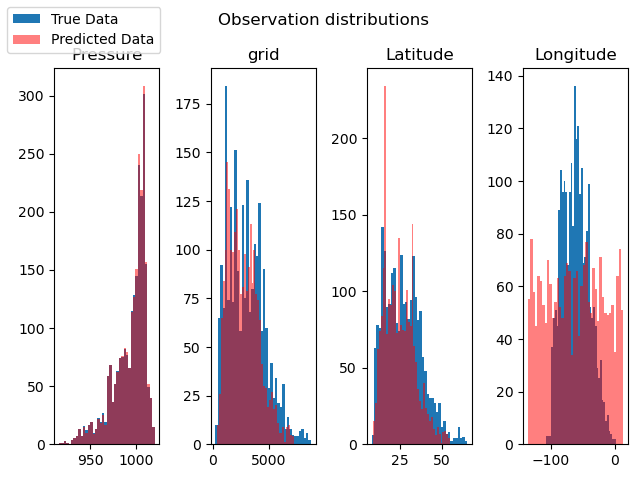

In [19]:
# Plot data distribution, compare 
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1, 4, tight_layout=True, dpi = 100)

# We can set the number of bins with the *bins* keyword argument.
ax1.hist(data.loc[2:2292, "Min_Pressure_mbar"], bins = 40)
ax1.hist(test["Min_Pressure_mbar"], bins=40, color = "red",alpha = 0.5)
ax1.set_title("Pressure")

ax2.hist(data.loc[2:2292:,"gridID"], bins=40)
ax2.hist(test["gridID"], bins=40, color = "red", alpha = 0.5)
ax2.set_title("grid")

ax3.hist(data.loc[2:2292:,"Latitude"], bins=40)
ax3.hist(test["Latitude"], bins=40, color = "red", alpha = 0.5)
ax3.set_title("Latitude")

ax4.hist(data.loc[2:2292:,"Longitude"], bins=40)
ax4.hist(test["Longitude"], bins=40, color = "red", alpha = 0.5)
ax4.set_title("Longitude")

fig.legend(["True Data", "Predicted Data"], loc="upper left")
fig.suptitle('Observation distributions')
fig.savefig('Report/Figures/Observation_distributions.png')

In [ ]:
# Map predicted vs true positions. no time data
fig = plt.figure(dpi=200)

# to get the effect of having just the states without a map "background"
# turn off the background patch and axes frame
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.PlateCarree(),
                  frameon=False)
ax.patch.set_visible(False)

# set_extent vars: [longitude_max/Western_bound, 
#                   longitude_min/Eastern_bound, 
#                   latitude_min/Southern_bound, 
#                   latitude_max/Northern_Bound]
ax.set_extent([-140, -0, 0, 50], ccrs.Geodetic())


#lons, lats = sample_data()
#ax.scatter(lons, lats, color='blue', label='Dataset 1')
ax.set_title('Storm Spread')

# turn the lons and lats into a shapely LineString
#track = sgeom.LineString(zip(lons, lats))

ax.scatter(data.loc[2292:2292+100,"Longitude"], 
            data.loc[2292:2292+100,"Latitude"], 
            c = "blue", alpha=0.5, s = 3, label = "Real Locations")
ax.scatter(test.loc[:100,"Longitude"], 
            test.loc[:100,"Latitude"], 
            c="red", alpha = 1, s = 5, label = "Predicted Locations")


ax.coastlines(alpha= 0.2)
ax.gridlines(draw_labels=True, linestyle='--')
#ax.add_geometries([track_buffer], ccrs.PlateCarree(),
#                  facecolor='#C8A2C8', alpha=0.5)
#ax.add_geometries([track], ccrs.PlateCarree(),
#                  facecolor='none', edgecolor='k')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Hurricane Trajectories')
ax.legend(loc = 'upper left')

plt.savefig('Report/Figures/Hurricane_Trajectories.png')
#plt.show()

In [ ]:
plt.savefig('Report/Figures/Hurricane_Trajectories.png')

In [ ]:
data.describe()